# PC 8 : Résolution numérique d'équations différentielles ordinaires

**<big> Préparation avant la PC :</big>**
**Les question 1 des exercices 1 et 2 sont à préparer** avant la séance de PC du 26/10.

**<big><font color=black><span style="background-color:skyblue">À rendre</span></font> après la PC :</big>**
**Les exercices 1 et 2 contiennent des parties <font color=black><span style="background-color:skyblue">à rendre</span></font> avant le 30/10 à 20h00 avec ceux de la PC7. Les questions 2 et 3 de l'exercice 1 et 3 et 4 de l'exercice 2 sont en <font color=black><span style="background-color:deepskyblue">bonus</span></font>**.

In [1]:
# Ce package permet de travailler efficacement avec des tableaux
import numpy as np
# Ce package permet de faire des sorties graphiques
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import cmath

## Exercice 1 : Méthodes de Runge-Kutta (RK)

On considère un problème de Cauchy de la forme

$$\left\{
\begin{aligned}
&y' = f(t,y)\\
&y(t_0) = y_0, 
\end{aligned}
\right.$$

avec un champ de vecteur $f:\mathbb{R}\times\mathbb{R} \to \mathbb{R}$ qu'on supposera aussi régulier que nécessaire. On cherche à résoudre ce problème de manière approchée aux temps $t_0<t_1<...<t_N=t_0+T$. On rappelle qu'on note $\Delta t_n = t_{n+1}-t_n$, et $\Delta t= \max\limits_{0\leq n\leq N} \Delta t_n$.

### Question 1 : méthode du point milieu explicite

La méthode du point de milieu explicite est définie par

$$ y_{n+1} = y_n + \Delta t_n f\left(t_n + \frac{\Delta t_n}{2},\quad{} y_n+\frac{\Delta t_n}{2}f(t_n,\ y_n)\right). $$

>C'est une méthode Runge Kutta d'ordre 2, et c'est celle qui est traditionnellement appelée RK2, même si ce n'est pas la seule méthode de Runge Kutta d'ordre 2. 

$1$. Montrer que, sous certaines hypothèse de régularité sur $f$, la méthode est consistante et d'ordre $2$, i.e. que l'erreur de consistance $E = O(\Delta t^2)$ où 

$$ E = \sum\limits_{n=0}^{N-1} |\varepsilon_n|, \qquad{} \varepsilon_n =  y(t_{n+1}) - y(t_n) - \Delta t_n f\left(t_n + \frac{\Delta t_n}{2},\quad{} y(t_n)+\frac{\Delta t_n}{2}f(t_n,\ y(t_n))\right). $$

*On pourra commencer par montrer que l'erreur locale de troncature $\varepsilon_n = O(\Delta t_n^3)$.*

>Remarque : comme on l'a vu dans la PC7, dès qu'un schéma est stable aux perturbations (comme le sont les schémas RK), l'erreur globale $\max\limits_{0\leq n\leq N} \vert y_n - y(t_n) \vert$ est du même ordre que l'erreur de consistance $E$.

<div class="alert alert-block alert-info">
    Supposons $f$ de classe $\mathcal{C}^1$. Par Taylor, on a
    $$\begin{align}
    \begin{cases}
    y(t_{n+1}) - y(t_n) &= y'(t_n)\Delta t_n + \frac{1}{2}y''(t_n) \Delta t_n^2 + O(\Delta t_n^3) \\
    f\left(t_n + \frac{\Delta t_n}{2},\quad{} y_n+\frac{\Delta t_n}{2}f(t_n,\ y_n)\right) &= f(t_n, y(t_n)) + \partial_t f(t_n, y(t_n)) \frac{\Delta t_n}{2} + \partial_y f(t_n, y(t_n)) \frac{\Delta t_n}{2}f(t_n, y(t_n)) + O(\Delta t_n^2) \\
    &= y'(t_n)\Delta t_n + \frac{1}{2}y''(t_n) \Delta t_n^2 + O(\Delta t_n^3)
    \end{cases}
    \end{align}$$
    d'où $\epsilon_n = O(\Delta t_n^3)$. $\\$
    Alors, $$ E = \sum_{n=0}^{N-1} |\epsilon_n| \leq C \sum_{n=0}^{N-1} \Delta t_n^3 \leq C \Delta t_n^2 \sum_{n=0}^{N-1} \Delta t_n = O(\Delta t_n^2).$$
</div>

$2$. **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** 
- Implémenter la méthode RK2. 
- Tester la sur le cas $f(t,y)=y$, pour $t_0=0$, $y_0=1$ et $T=1$. 
- Afficher sur le même graphe la solution obtenue pour un pas de temps constant $\Delta t_n = \Delta t=2^{-5}$ et la solution théorique. 
- Tracer la courbe de convergence de $\max_{0\leq n \leq N } |y(t_n) - y_n|$ en fonction du nombre $N$ de pas de temps. Pour cela, prendre $N = 2^i$ avec $i$ entiers allant de 5 à 10. Vérifier qu'elle est en $O(\Delta t^2)$, c'est à dire que la méthode converge à l'ordre 2.

In [2]:
def f_1(t, x):
    return x

In [3]:
def RK2(f, y0, t):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma RK2
    ----------   
    parametres:
    f       : fonction second membre, dépend de t (en 1e argument) et de x (en 2nd argument)
    y_0     : valeur au temps t_0
    t       : tableau contenant les temps t_0, t_1, ..., t_N = T
    
    valeurs de retour:
    tab_y  : tableau contenant les valeurs y_n à chaque itération
    """
    n = len(t)
    tab_y = np.zeros(n)
    
    tab_y[0] = y0
    for i in range(1, n):
        delta_tn = t[i] - t[i-1]
        tab_y[i] = tab_y[i-1] + delta_tn*f(t[i-1] + delta_tn/2, tab_y[i-1] + (delta_tn/2)*f(t[i-1], tab_y[i-1]))
        
    return tab_y

In [4]:
# Tester votre algorithme avec f1 comme second membre et avec les paramètres donnés
# Comparer avec la solution exacte
n = 2**5
t = np.linspace(0, 1, n+1)
y0 = 1

tab_y = RK2(f_1, y0, t)
sol_exacte = np.exp(t)
erreur_globale = np.max(abs(tab_y - sol_exacte))
print(f"erreur globale = {erreur_globale}")

erreur globale = 0.0004321544787861953


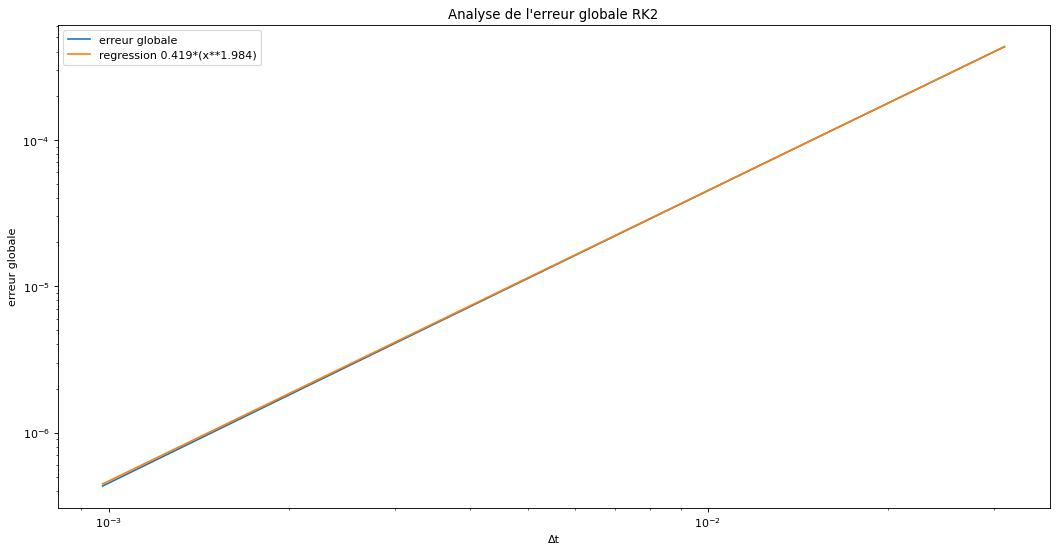

l'erreur globale est proportionelle à Δt à la puissance 1.984130504125874


In [5]:
# Tracer la courbe de convergence en fonction de N en échelle loglog
# Comparer avec la courbe (Delta t)^2
plt.figure(figsize=(16, 8), dpi=80)

en = np.zeros(6)
delta_t = np.zeros(6)

for i in range(5, 11):
    n = 2**i #on calcule l'erreur globale pour chaque N
    t = np.linspace(0, 1, n+1)
    
    tab_y = RK2(f_1, y0, t)
    
    en[i-5] = np.max(abs(np.exp(t) - tab_y)) 
    delta_t[i-5] = 1/(2**i)

plt.title("Analyse de l'erreur globale RK2")
plt.plot(delta_t, en, label="erreur globale")

#alors, vérifions qu'on a le bon exposant avec une régression
def myExpFunc(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(myExpFunc, delta_t, en)
plt.plot(delta_t, myExpFunc(delta_t, *popt), label= "regression {0:.3f}*(x**{1:.3f})".format(*popt))

plt.xlabel("Δt")
plt.ylabel("erreur globale")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

print(f"l'erreur globale est proportionelle à Δt à la puissance {popt[1]}")


<div class="alert alert-block alert-info">
    On en conclue que la méthode est bien d'ordre 2.
</div>

### Question 2 : méthode RK4
Il existe de nombreuses méthodes de Runge-Kutta d'ordre 4, mais celle qui est communément nommmée RK4 est définie de la façon suivante :

$$ y_{n+1} = y_n+\frac{\Delta t_n}{6}(k_1+2k_2+2k_3+k_4),$$

où

$$\begin{aligned}
	    k_1 & = f(t_n, \ y_n), \\
	    k_2 & = f\left(t_n+\frac{\Delta t_n}{2},\ y_n+\frac{\Delta t_n}{2}k_1\right), \\
	    k_3 & = f\left(t_n+\frac{\Delta t_n}{2},\ y_n+\frac{\Delta t_n}{2}k_2\right), \\
	    k_4 & = f(t_n+\Delta t_n,\ y_n+\Delta t_n k_3).
	\end{aligned}$$
>
> Les $k_i$ dépendent de $n$, mais on omet souvent cette dépendance dans les notations pour alléger un peu l'écriture de ces schémas.
>   

**<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** Implémenter la méthode RK4, la tester sur le même exemple que pour RK2, et vérifier numériquement que cette méthode est d'ordre 4.

In [6]:
def RK4(f, y0, t):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma RK4
    ----------   
    parametres:
    f       : fonction second membre, dépend de t (en 1e argument) et de x (en 2nd argument)
    y_0     : valeur au temps t_0
    t       : tableau contenant les temps t_0, t_1, ..., t_N = T
    
    valeurs de retour:
    tab_y  : tableau contenant les valeurs y_n à chaque itération
    """
    n = len(t)
    tab_y = np.zeros(n)
    
    tab_y[0] = y0
    for i in range(1, n):
        delta_tn = t[i] - t[i-1]
        
        k1 = f(t[i-1], tab_y[i-1])
        k2 = f(t[i-1] + delta_tn/2, tab_y[i-1] + (delta_tn/2)*k1)
        k3 = f(t[i-1] + delta_tn/2, tab_y[i-1] + (delta_tn/2)*k2)
        k4 = f(t[i-1] + delta_tn, tab_y[i-1] + delta_tn*k3)
        
        tab_y[i] = tab_y[i-1] + (delta_tn/6)*(k1 + 2*k2 + 2*k3 + k4)
        
    return tab_y

In [7]:
# Tester numériquement votre algorithme 
# Comparer avec la solution analytique
n = 2**5
t = np.linspace(0, 1, n+1)
y0 = 1

tab_y = RK4(f_1, y0, t)
sol_exacte = np.exp(t)
erreur_globale = np.max(abs(tab_y - sol_exacte))
print(f"erreur globale = {erreur_globale}")

erreur globale = 2.1047852349909135e-08


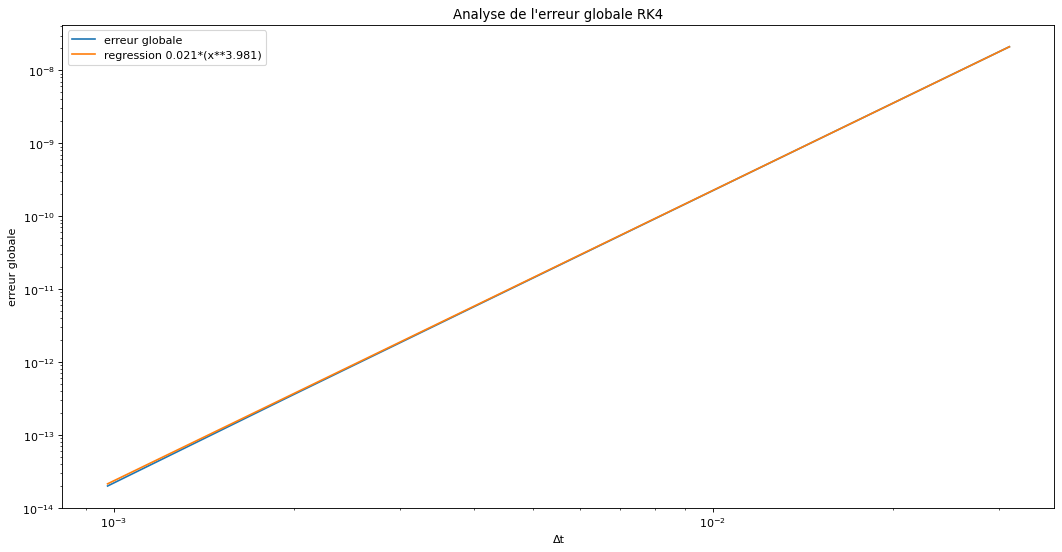

l'erreur globale est proportionelle à Δt à la puissance 3.9813000994489323


In [8]:
# Tracer la courbe de convergence en fonction de N en échelle loglog
# Comparer avec la courbe (Delta t)^4
plt.figure(figsize=(16, 8), dpi=80)

en = np.zeros(6)
delta_t = np.zeros(6)

for i in range(5, 11):
    n = 2**i #on calcule l'erreur globale pour chaque N
    t = np.linspace(0, 1, n+1)
    
    tab_y = RK4(f_1, y0, t)
    
    en[i-5] = np.max(abs(np.exp(t) - tab_y)) 
    delta_t[i-5] = 1/(2**i)

plt.title("Analyse de l'erreur globale RK4")
plt.plot(delta_t, en, label="erreur globale")

#alors, vérifions qu'on a le bon exposant avec une régression
def myExpFunc(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(myExpFunc, delta_t, en)
plt.plot(delta_t, myExpFunc(delta_t, *popt), label= "regression {0:.3f}*(x**{1:.3f})".format(*popt))

plt.xlabel("Δt")
plt.ylabel("erreur globale")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

print(f"l'erreur globale est proportionelle à Δt à la puissance {popt[1]}")

<div class="alert alert-block alert-info">
    On en conclue que la méthode est bien d'ordre 4.
</div>

### Question 3 : méthode du point milieu implicite

On considère une méthode RK de la forme suivante

$$\left\{
\begin{aligned}
 k_n &= f\left( t_n + c \Delta t_n, \quad{} y_n + a k_n \Delta t_n\right) \qquad{}& (1a)\\
y_{n+1} &= y_n + b k_n \Delta t_n, \qquad{}&(1b)
\end{aligned}
\right. $$

où $a, b, c \in \mathbb{R}$ sont des constantes.

$1$. En supposant $f$ globalement lipschitizienne par rapport à la deuxième variable et $\Delta t$ suffisamment petit, montrer qu'il existe un unique $k_n$ satisfaisant (1a). 

$2$. $a$. Écrire le développement limité de $y(t_n + \Delta t_n)$ jusqu'à l'ordre $O(\Delta t_n^3)$ en fonction de $f$ et de ses dérivées.

$b$. De même, écrire un développement limité de $k_{n}$ faisant apparaitre les mêmes dérivées et ne faisant pas apparaître $k_n$.

$c$. Comparer $y(t_n + \Delta t_n)$ et $y_{n+1}$ et déterminer $a$, $b$ et $c$ tel que la méthode (1) soit d'ordre supérieur ou égale à 2. 

$3$. On définit $y_{n+\frac{1}{2}} = y_n + \frac{\Delta t_n}{2}k_{n}$. Réécrire le schéma correspondant sans faire apparaitre $k_{n}$ et justifier l'appelation *méthode du point milieu implicite*.

$4$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** Implémenter la méthode du point milieu implicite sur le même cas qu'à la question 1 et vérifier numériquement son ordre. 
*On utilisera un algorithme de Newton pour la résolution de l'équation non-linéaire comme pour le schéma d'Euler implicite à la PC7.*

<div class="alert alert-block alert-info">
    Soit $g: k \mapsto f(t_n + c\Delta t_n, y_n + a k \Delta t_n)$. Montrons que $g$ admet un point fixe unique. $\\$
    Soient $k, \tilde{k} \in \mathbb{R}$ des points fixes de $g$. $\\$
    Comme $f$ est globalement lipschitizienne par rapport à la deuxième variable, on a
    $$ |k - \tilde{k}| = |g(k) - g(\tilde{k})| \leq C |a| \Delta t_n |k - \tilde{k}|.$$
    Alors, $\Delta t_n$ suffisament petit donne $C |a| \Delta t_n < 1 \implies |k - \tilde{k}| = 0$.
</div>

<div class="alert alert-block alert-info">
    On a $a = c = \frac{1}{2}$ et $b = 1$. $\\$
    Alors $y_{n+1} = y_n + k_n \Delta t_n \iff k_n = \frac{y_{n+1} - y_n}{\Delta t_n}$. Ce qui donne
    $$ k_n = f\left( t_n + \frac{\Delta t_n}{2}, \frac{y_n + y_{n+1}}{2}\right) $$
    et on a la récurrence
    $$ y_{n+1} = y_n + \Delta t_n f\left( t_n + \frac{\Delta t_n}{2}, \frac{y_n + y_{n+1}}{2}\right).$$
</div>

In [9]:
def Newton_scalaire(g, dg, x0, tol=1.e-12, N_max=100):
    """
    Calcule une solution approchée du problème g(x)=0 par la méthode de Newton
    ----------   
    parametres:
    g     : fonction dont on cherche le zero
    dg    : fonction dérivée de g
    x_0   : valeur initiale de la suite
    tol   : on utilise | g(x_n) | < tol comme critère d'arrêt 
    N_max : nombre maximal d'itérations
    
    valeurs de retour:
    x  : x_n à la dernière itération
    
    !!! afficher un message d'avertissement si on n'a pas convergé (si on n'a pas | g(x) | < tol) !!!
    """  
    x_n = x0
    eps_n = 1
    
    n = 1
    while (n < N_max and eps_n >= tol):
        y = x_n - g(x_n)/dg(x_n) #on calcule x_{n+1}
        
        eps_n = abs(y - x_n)
        x_n = y
        n += 1
    
    if(abs(g(x_n)) >= tol):
        print("La méthode n'a pas convergé!!")
        
    return x_n

In [10]:
# Cellule de test pour valider votre fonction Newton_scalaire (voir tests unitaires de la PC5)
# ou pour tester scipy.optimize.newton
def f1(x):
    # définition de f1
    return np.exp(x) - 2

def df1(x):
    # définition de la dérivée de f1
    return np.exp(x)

# Test sur f1
x_1 = Newton_scalaire(f1, df1, 0.5)
print(x_1)
print(f"f1(resultat) = {f1(x_1)}")

0.6931471805599454
f1(resultat) = 0.0


In [11]:
def pt_milieu_implicite(f, df, y0, t):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma du point milieu implicite
    ----------   
    parametres:
    f       : fonction second membre, dépend de t (en 1e argument) et de x (en 2nd argument)
    y_0     : valeur au temps t_0
    t       : tableau contenant les temps t_0, t_1, ..., t_N = T
    
    valeurs de retour:
    tab_y  : tableau contenant les valeurs y_n à chaque itération
    """
    n = len(t)
    tab_y = np.zeros(n)
    
    #parametres pour g et dg
    yn = y0
    tn = 0
    delta_t = 1/(n-1)
    
    # --- Bloc à modifier et à placer dans votre fonction ---
    # construire la fonction satisfaite par y_n+1 et sa dérivée à partir de f et df
    def g(x):
        # fonction dont on cherche le zéro 
        return x - yn - delta_t*f(tn + delta_t/2, (x + yn)/2)
    def dg(x):
        # dérivée de la fonction dont on cherche le zéro 
        return 1 - (delta_t/2)*df(tn + delta_t/2, (x + yn)/2)
    # --- Fin du bloc ---
    
    tab_y[0] = y0
    for i in range(1, n):
        yn = tab_y[i-1] #update yn
        tn = t[i-1] #update tn
        tab_y[i] = Newton_scalaire(g, dg, tab_y[i-1])
    
    return tab_y

In [12]:
# Tester votre algorithme sur f_1
def f_1(t, y):
    # fonction second membre
    return y

def df_1(t, y):
    # fonction dérivée de f_1 en fonction de y
    return 1


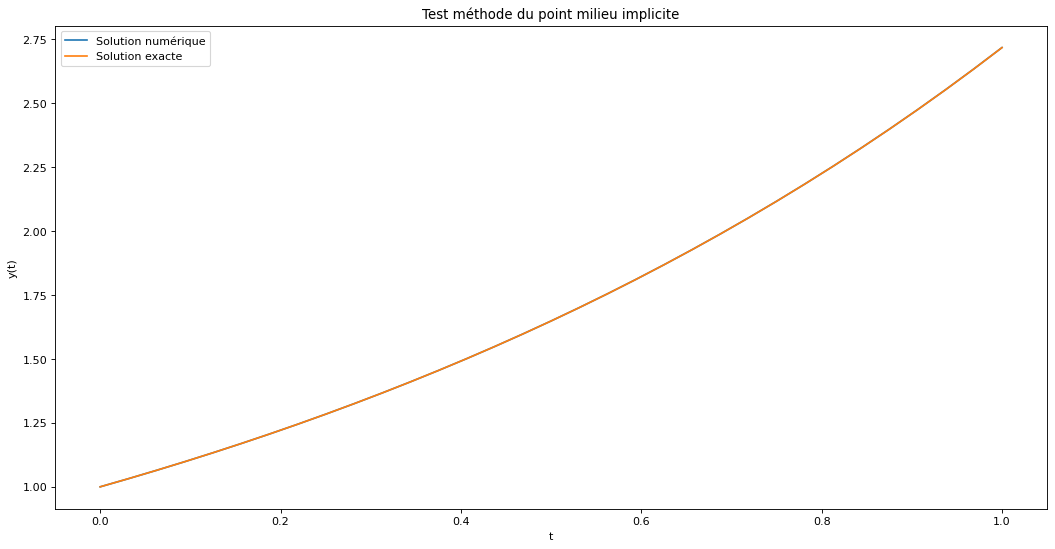

In [13]:
# Tracer la solution numérique obtenue avec le schéma du point milieu implicite
# Comparer à la solution exacte 

n = 2**5
t = np.linspace(0, 1, n+1)
tab_y = pt_milieu_implicite(f_1, df_1, y0, t)

plt.figure(figsize=(16, 8), dpi=80)
plt.title("Test méthode du point milieu implicite")
plt.plot(t,  tab_y, label="Solution numérique")
plt.plot(t, np.exp(t), label="Solution exacte")

plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend()
plt.show()

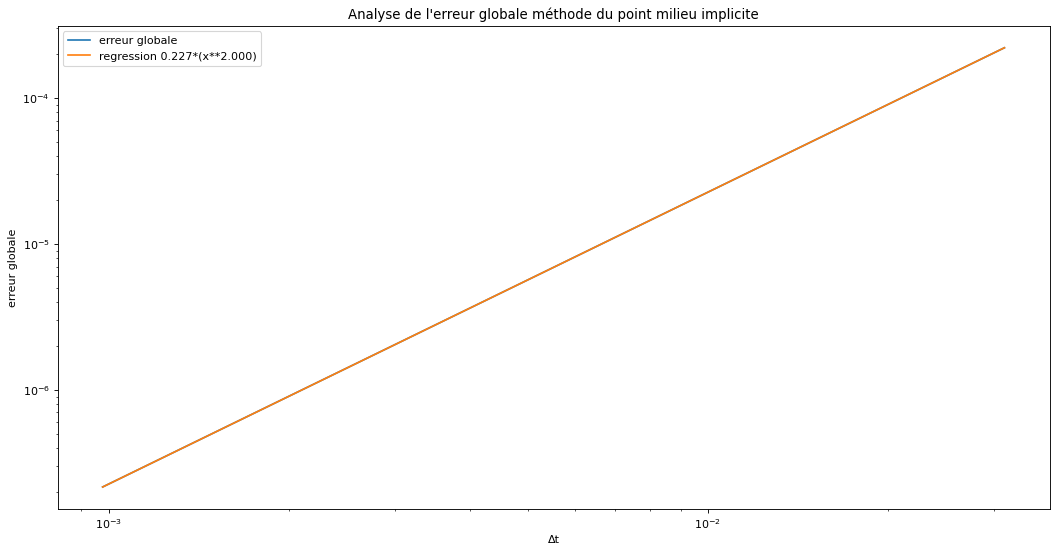

l'erreur globale est proportionelle à Δt à la puissance 2.000183731092243


In [14]:
# Tracer la courbe de convergence en fonction de N en échelle loglog
# Comparer avec la courbe (Delta t)^2
plt.figure(figsize=(16, 8), dpi=80)

en = np.zeros(6)
delta_t = np.zeros(6)

for i in range(5, 11):
    n = 2**i #on calcule l'erreur globale pour chaque N
    t = np.linspace(0, 1, n+1)
    
    tab_y = pt_milieu_implicite(f_1, df_1, y0, t)
    
    en[i-5] = np.max(abs(np.exp(t) - tab_y)) 
    delta_t[i-5] = 1/(2**i)

plt.title("Analyse de l'erreur globale méthode du point milieu implicite")
plt.plot(delta_t, en, label="erreur globale")

#alors, vérifions qu'on a le bon exposant avec une régression
def myExpFunc(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(myExpFunc, delta_t, en)
plt.plot(delta_t, myExpFunc(delta_t, *popt), label= "regression {0:.3f}*(x**{1:.3f})".format(*popt))

plt.xlabel("Δt")
plt.ylabel("erreur globale")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

print(f"l'erreur globale est proportionelle à Δt à la puissance {popt[1]}")

<div class="alert alert-block alert-info">
    On en conclue que la méthode est bien d'ordre 2.
</div>

### Question 4 : tableaux de Butcher
>Considérons maintenant une méthode de Runge-Kutta explicite générale, avec $q \geq 1$ étapes intermédiaires utilisées pour passer de $y_n$ à $y_{n+1}$. La valeur $y_{n+1}$ est donc calculée de la manière suivante
>
>$$ y_{n+1} = y_n + \Delta t_n \sum_{j=1}^q b_j k_j,$$
>
>où les $k_i$ sont définis par
>	
>$$\begin{array}{ccl}
	k_1 & = & f\left(t_n, \ y_n\right) \\ 
	k_2 & = & f\left(t_n+c_2\Delta t_n, \ y_n+\Delta t_n(a_{21}k_1)\right)\\
	k_3 & = & f\left(t_n+c_3\Delta t_n, \ y_n+\Delta t_n(a_{31}k_1+a_{32}k_2)\right)\\
	\vdots & \vdots & \vdots \\
	k_q & = & f\left(t_n+c_q\Delta t_n, \ y_n+\Delta t_n(a_{q1}k_1+...+a_{q,q-1}k_{q-1})\right).
	\end{array}$$
>
>La méthode obtenue est donc caractérisée par le nombre d'étapes $q$ et par les coefficients $(a_{ij})_{1 \leq j<i \leq q}$, $(b_j)_{j=1,...,q}$ et $(c_i)_{i=2,...,q}$. Toutes ces informations peuvent êtres regroupées dans un tableau de Butcher (nommé après John C. Butcher)
>
>$$\begin{array}{c|ccccc}
	0 & 0 & 0& 0& 0& 0 \\
	c_2 & a_{21} & 0& 0& 0 & 0\\
	c_3 & a_{31} & a_{32} & 0& 0 & 0 \\
	\vdots & \vdots & & \ddots &0 & 0   \\ 
	c_q & a_{q1} & a_{q2} & \cdots & a_{q,q-1} & 0   \\
	\hline 
	& b_1 & b_2 & \cdots &b_{q-1} & b_q 
	\end{array}$$

$1$. Écrire les tableaux de Butcher associées aux méthodes RK2 et RK4 décrites dans les questions précédents.

<div class="alert alert-block alert-info">
    Pour la méthode RK2 on a
    $$\begin{array}{c|ccccc}
	0 & 0 & 0 \\
	\frac{1}{2} & \frac{1}{2} & 0\\
	\hline 
	& 0 & 1 &
	\end{array}$$
    et pour la méthode RK4 on a
    $$\begin{array}{c|ccccc}
	0 & 0 & 0& 0& 0\\
	\frac{1}{2} & \frac{1}{2} & 0& 0& 0 \\
	\frac{1}{2} & 0 & \frac{1}{2} & 0& 0\\
    1 & 0 & 0 & 1 & 0 \\
	\hline 
	& \frac{1}{6} & \frac{2}{6} & \frac{2}{6} & \frac{1}{6}
	\end{array}$$
</div>

$2$. Implémenter une fonction qui prend en argument les tableaux $A = (a_{i,j})_{i,j = 1, \dots, p}, B = (b_i)_{i=1,\dots,p}, C = (c_i)_{i=1,\dots,p}$ décrits ci-haut (notamment $A$ strictement triangulaire inférieur), et qui calcule la solution numérique obtenue par la méthode RK explicite associée aux tableaux. Tester sur le même exemple que ci-dessus, et vérifier que vous obtenez bien le même résultat.

>L'implémentation à l'aide des tableaux est un peu plus délicate, mais permet de changer de méthode RK simplement en changeant de tableau.

In [15]:
def RK_Butcher(f, y0, t, A, B, C):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma RK explicite décrit par les coefficients A, B et C
    ----------   
    parametres:
    f       : fonction second membre, dépend de t (en 1e argument) et de x (en 2nd argument)
    y_0     : valeur au temps t_0
    t       : tableau contenant les temps t_0, t_1, ..., t_N = T
    A       : matrice de taille qxq, triangulaire inférieure et de diagonale nulle
    B       : vecteur de taille q
    C       : vecteur de taille q
    
    valeurs de retour:
    tab_y  : tableau contenant les valeurs y_n à chaque itération
    """
    n = len(t)
    delta_t = 1/(n-1)
    tab_y = np.zeros(n)
    
    q = len(B)
    
    tab_y[0] = y0
    for i in range(1, n):
        #d'abord, on calcules les k
        k = np.zeros(q)
        for j in range(0, q):
            arg_t = t[i-1] + C[j]*delta_t
            arg_y = tab_y[i-1]
            for jj in range(0, j):
                arg_y += delta_t*A[j][jj]*k[jj]
            k[j] = f(arg_t, arg_y)
        #alors, on calcule y_{n+1}
        tab_y[i] = tab_y[i-1]
        for j in range(0, q):
            tab_y[i] += delta_t*B[j]*k[j]
    return tab_y

In [16]:
# Définir les tableaux de Butcher de RK2 et tester votre algorithme 
# Comparer avec votre implémentation de RK2 sur la fonction f1
n = 2**5
t = np.linspace(0, 1, n+1)
y0 = 1

A = np.array([[0, 0], [0.5, 0]])
B = np.array([0, 1])
C = np.array([0, 0.5])

tab_y_butcher2 = RK_Butcher(f_1, y0, t, A, B, C)
tab_y_RK2 = RK2(f_1, y0, t)
assert(np.array_equal(np.round(tab_y_butcher2 - tab_y_RK2), np.zeros(n+1)) == True)

In [17]:
# Définir les tableaux de Butcher de RK4 et tester votre algorithme 
# Comparer avec votre implémentation de RK4 sur la fonction f1
n = 2**5
t = np.linspace(0, 1, n+1)
y0 = 1

A = np.array([[0, 0, 0, 0], [0.5, 0, 0, 0], [0, 0.5, 0, 0], [0, 0, 1, 0]])
B = np.array([1/6.0, 2/6.0, 2/6.0, 1/6.0])
C = np.array([0, 0.5, 0.5, 1])

tab_y_butcher4 = RK_Butcher(f_1, y0, t, A, B, C)
tab_y_RK4 = RK4(f_1, y0, t)
assert(np.array_equal(np.round(tab_y_butcher4 - tab_y_RK4), np.zeros(n+1)) == True)

$3$. Remarquez que la matrice $A$ du tableau de Butcher ci-haut est strictement triangulaire inférieure. A quelle hypothèse qu'on a faite au départ cette structure est-elle liée?

**Réponse :**

<div class="alert alert-block alert-info">
    La matrice $A$ est strictement triangulaire inférieure car chaque $k_i$ ne dépend que des $k_j$ avec $j < i$.
</div>

## Exercice 2 : Un système conservatif

>On considère l'oscillateur harmonique
>
>$$ q''+q=0, $$
>
>qu'on réécrit comme un système d'ordre 1 à deux variables :
>
>$$ \left\{ \begin{aligned}
q'&=p\\
p'&=-q.
\end{aligned} \right. \qquad{} (2) $$
>
>*$q$ peut être interprété comme une position, et $p$ comme une vitesse.*


### Question 1 : Une propriété importante du système continu

Montrer que le hamiltonien $\mathcal{H}(q,p)=\frac{1}{2}(p^2+q^2)$ (parfois aussi appelé énergie), est conservé au cours du temps pour toute solution de (2).

<div class="alert alert-block alert-info">
    On a
    $$\begin{align}
    \frac{d}{dt} \mathcal{H}(q,p) &= pp' + qq' \\
    &= -pq + pq \\
    &= 0
    \end{align}$$
</div>

### Question 2 : Schéma d'ordre 1

$1$. Ecrire explicitement les relations de récurrence entre $(q_{n+1},p_{n+1})$ et $(q_{n},p_{n})$ définies par les schémas d'Euler explicite et implicite.  En particulier, montrer que le schéma implicite ne nécessite pas la résolution d'une équation non-linéaire pour ce problème. 

$2$. Calculer explicitement la suite $\mathcal{H}(q_{n},p_{n})$ en fonction de $n$, $\Delta t$ et $\mathcal{H}(q_0,p_0)$ pour les schéma d'Euler explicite et implicite.

$3$. **<font color=black><span style="background-color:skyblue">À rendre :</span></font>** 

$a$. Implémenter les schéma d'Euler explicite et implicite pour le système (2).

$b$. Tester avec $\Delta t_n = \Delta t = 2^{-5}$, $(q_0,p_0) = (1,0)$ et $T=2^4$ (i.e. $N=2^9$ pas de temps) et tracer $p_n$ et $q_n$ en fonction du temps, ainsi que la solution analytique.

$c$. Tracer dans le plan de phase $(q,p)$ la solution obtenue avec les schémas d'Euler explicite, implicite et la solution analytique, c'est-à-dire avec $p$ en abscisse et $q$ en ordonnée.

$d$. Tracer l'hamiltonien $\mathcal{H}(q,p)$ en fonction du temps, pour les deux schémas et pour la solution analytique. 

$e$. Commenter les valeurs du Hamiltonien et les conséquences sur les courbes $p$ et $q$ en fonction du temps et dans le plan de phase $(q, p)$.

<div class="alert alert-block alert-info">
    Pour la méthode d'Euler explicite on a
    $$\begin{align}
    \begin{cases}
    q_{n+1} &= q_n + \Delta t p_n\\
    p_{n+1} &= p_n - \Delta t q_n
    \end{cases}
    \end{align}$$
    ce qui donne $H(q_{n+1}, p_{n+1}) = (1+ \Delta t^2)H(q_n, p_n) = (1+ \Delta t^2)^nH(q_0, p_0)$. $\\$
    On en conclue que pour le schéma d'Euler explicite l'énergie est croissante. $\\$
    Pour la méthode d'Euler implicite on a
    $$\begin{align}
    \begin{cases}
    q_{n+1} &= \frac{q_n + \Delta t p_n}{1 + \Delta t^2}\\
    p_{n+1} &= \frac{p_n - \Delta t q_n}{1 + \Delta t^2}
    \end{cases}
    \end{align}$$
    ce qui donne $H(q_{n+1}, p_{n+1}) = \frac{H(q_n, p_n)}{1+ \Delta t^2} = \frac{H(q_0, p_0)}{(1+ \Delta t^2)^n}$. $\\$
    On en conclue que pour le schéma d'Euler implicite l'énergie est décroissante.
</div>

In [18]:
#3)a)
def Euler_explicite_oscillateur(q0, p0, dt, N):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma d'Euler explicite sur le problème (2)
    ----------   
    parametres :
    q0, p0 : conditions initiale
    dt     : pas de temps 
    N      : nombre de pas de temps
    
    valeurs de retour :
    (tab_q, tab_p) : tableaux contenant les valeurs de p_n et q_n à chaque itération
    """
    tab_q = np.zeros(N + 1)
    tab_p = np.zeros(N + 1)
    
    tab_q[0] = q0
    tab_p[0] = p0
    for i in range(1, N+1):
        tab_q[i] = tab_q[i-1] + dt*tab_p[i-1]
        tab_p[i] = tab_p[i-1] - dt*tab_q[i-1]
        
    return tab_q, tab_p

In [19]:
def Euler_implicite_oscillateur(q0, p0, dt, N):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma d'Euler implicite sur le problème (2)
    ----------   
    parametres :
    q0, p0 : conditions initiale
    dt     : pas de temps 
    N      : nombre de pas de temps
    
    valeurs de retour :
    (tab_q, tab_p) : tableaux contenant les valeurs de p_n et q_n à chaque itération
    """
    tab_q = np.zeros(N + 1)
    tab_p = np.zeros(N + 1)
    
    tab_q[0] = q0
    tab_p[0] = p0
    for i in range(1, N+1):
        tab_q[i] = (tab_q[i-1] + dt*tab_p[i-1])/(1 + dt**2)
        tab_p[i] = (tab_p[i-1] - dt*tab_q[i-1])/(1 + dt**2)
        
    return tab_q, tab_p

In [20]:
#b)
# Tester les schémas d'Euler explicite et implicite sur ce cas test avec les paramètres donnés
q0 = 1
p0 = 0
dt = 2**-5
N = 2**9

tab_q_explicite, tab_p_explicite = Euler_explicite_oscillateur(q0, p0, dt, N)
tab_q_implicite, tab_p_implicite = Euler_implicite_oscillateur(q0, p0, dt, N)

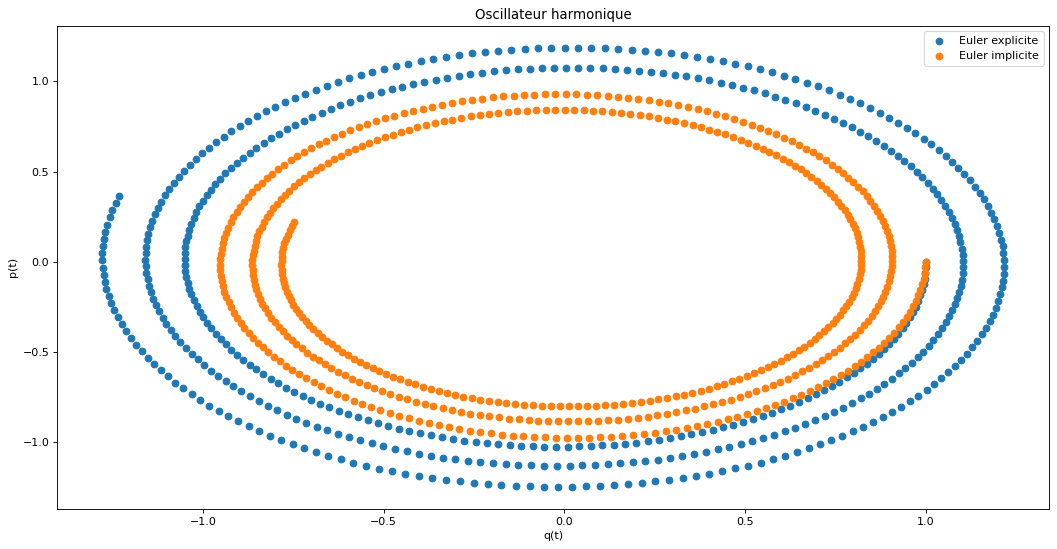

In [21]:
# Tracer les solutions pn et qn obtenues en fonction du temps t et comparer à la solution exacte 
plt.figure(figsize=(16, 8), dpi=80)
plt.title("Oscillateur harmonique")
plt.scatter(tab_q_explicite, tab_p_explicite, label="Euler explicite")
plt.scatter(tab_q_implicite, tab_p_implicite, label="Euler implicite")
plt.xlabel("q(t)")
plt.ylabel("p(t)")
plt.legend()
plt.show()

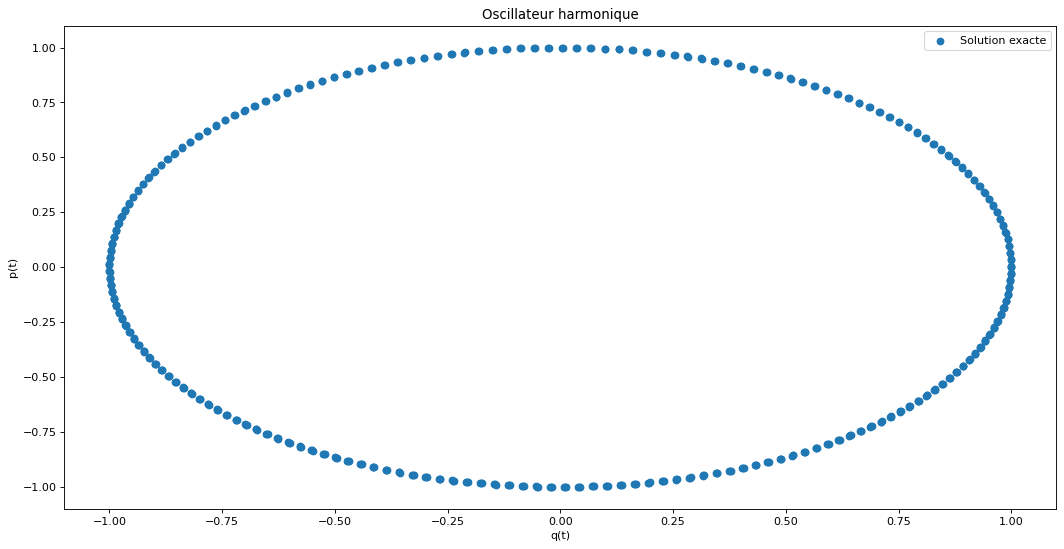

In [22]:
#c)
# Tracer les solutions numériques pn et qn et exacte p(tn), q(tn) dans le plan de phase (p,q) 
t = np.linspace(0, 16, N+1)
plt.figure(figsize=(16, 8), dpi=80)
plt.title("Oscillateur harmonique")
plt.scatter(np.cos(t), -np.sin(t), label="Solution exacte")
plt.xlabel("q(t)")
plt.ylabel("p(t)")
plt.legend()
plt.show()

In [23]:
def H(q, p):
    # définition du Hamiltonien
    return (p**2+q**2)/2

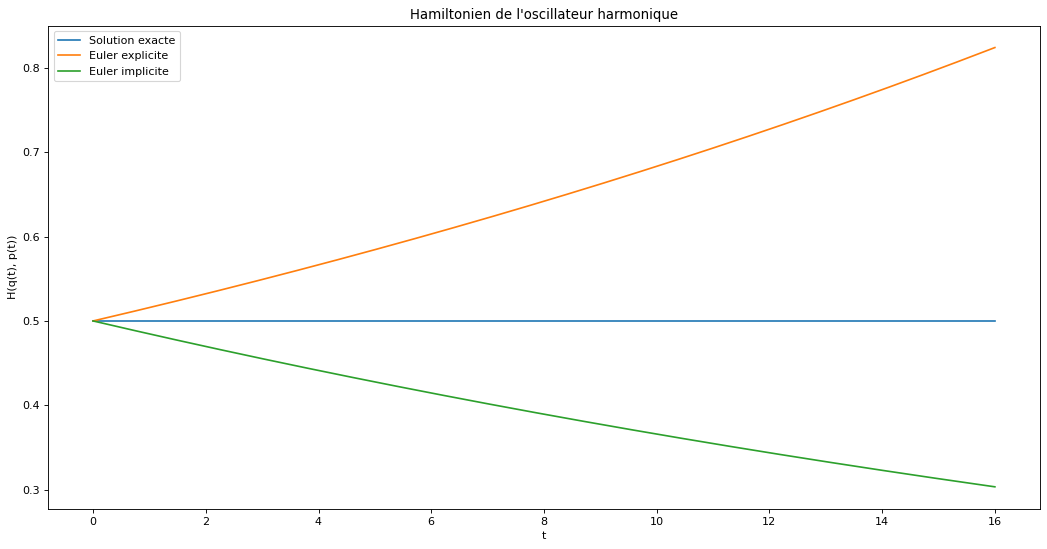

In [24]:
# Tracer H(pn,qn) pour les solutions numériques et H(p(tn),q(tn)) pour la solution exacte en fonction du temps 
plt.figure(figsize=(16, 8), dpi=80)
plt.title("Hamiltonien de l'oscillateur harmonique")
plt.plot(t, np.ones(len(t))*0.5, label="Solution exacte")
plt.plot(t, 0.5*(tab_q_explicite**2 + tab_p_explicite**2), label="Euler explicite")
plt.plot(t, 0.5*(tab_q_implicite**2 + tab_p_implicite**2), label="Euler implicite")
plt.xlabel("t")
plt.ylabel("H(q(t), p(t))")
plt.legend()
plt.show()

**Réponse :**

<div class="alert alert-block alert-info">
    Comme attendu, pour le schéma d'Euler explicite l'énergie $H(q_{n+1}, p_{n+1}) = (1+ \Delta t^2)H(q_n, p_n) = (1+ \Delta t^2)^nH(q_0, p_0)$ est croissante. $\\$
    Et pour le schéma d'Euler implicite l'énergie $H(q_{n+1}, p_{n+1}) = \frac{H(q_n, p_n)}{1+ \Delta t^2} = \frac{H(q_0, p_0)}{(1+ \Delta t^2)^n}$ est décroissante. $\\$
    On en conclue que les deux méthodes ne sont pas à l'hauteur pour résoudre le probléme. En effet, pour le schéma d'Euler explicite on aura même des problèmes de overflow.
</div>

### Question 3 : Schéma d'ordre 2

$1$. Réécrire le schéma RK2 (décrit dans l'exercice précédent) adapté au système (2).

$2$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** 

$a$. Implémenter le schéma RK2 pour le système (2).

$b$. Le tester avec $\Delta t_n = \Delta t = 2^{-3}$, $(q_0,p_0) = (1,0)$ et $T=2^8$ (i.e. $N=2^{11}$ pas de temps) et afficher $p_n$, $q_n$ et $\mathcal{H}(q_n,p_n)$ en fonction du temps ainsi que $(q_n,p_n)$ dans le plan de phase. Afficher à chaque fois également la solution analytique.

$c$. Commenter les résultats obtenus.

<div class="alert alert-block alert-info">
    Soit $z(t) = q(t) + ip(t)$ et $z_n = q_n + ip_n$. $\\$
    On a $z'(t) = p(t) - iq(t) = -iz(t)$. Posons $f(t, z(t)) = -iz(t)$, on a $z'(t) = f(t, z(t))$. $\\$
    Alors, le schéma RK2 est
    $$\begin{align}
    z_{n+1} &= z_n + \Delta t_n f\left(t_n + \frac{\Delta t_n}{2}, z_n + \frac{\Delta t_n}{2}f(t, z_n)\right) \\
    &= z_n - i \Delta t_n \left(z_n + \frac{\Delta t_n}{2}f(t, z_n)\right) \\
    &= z_n - i \Delta t_n \left(z_n - i \frac{\Delta t_n}{2} z_n\right) \\
    &= z_n - i \Delta t_n z_n - \frac{\Delta t_n^2}{2}z_n
    \end{align}$$
    ce qui donne
    $$\begin{align}
    \begin{cases}
    q_{n+1} &= \left(1 - \frac{\Delta t_n^2}{2}\right)q_n + \Delta t_n p_n \\
    p_{n+1} &= -\Delta t_n q_n + \left(1 - \frac{\Delta t_n^2}{2}\right)p_n
    \end{cases}
    \end{align}$$
</div>

In [25]:
def RK2_oscillateur(q0, p0, dt, N):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma RK2 sur le problème (2)
    ----------   
    parametres:
    q0, p0 : conditions initiale
    dt     : pas de temps 
    N      : nombre de pas de temps
    
    valeurs de retour:
    (tab_q, tab_p)  : tableaux contenant les valeurs de p_n et q_n à chaque itération
    """   
    tab_q = np.zeros(N+1)
    tab_p = np.zeros(N+1)
    
    tab_q[0] = q0
    tab_p[0] = p0
    for i in range(1, N+1):
        delta_tn = t[i] - t[i-1]
        tab_q[i] = tab_q[i-1] + delta_tn*tab_p[i-1]
        tab_p[i] = tab_p[i-1] - delta_tn*tab_q[i-1]
        
    return tab_q, tab_p

In [26]:
# Tester votre implémentation avec les paramètres donnés
q0 = 1
p0 = 0
dt = 2**-5
N = 2**9

tab_q_RK2, tab_p_RK2 = RK2_oscillateur(q0, p0, dt, N)

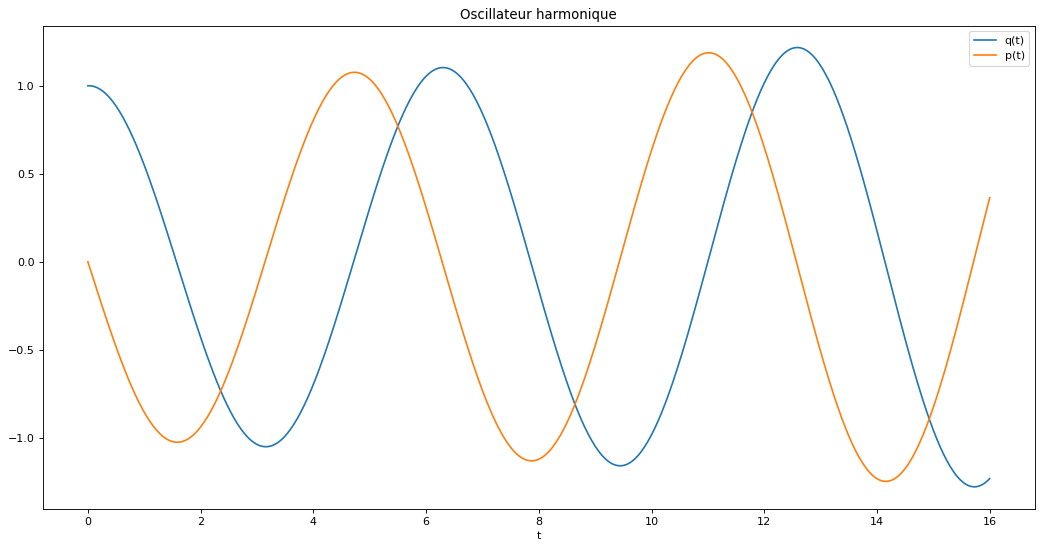

In [27]:
# Tracer pn et qn en fonction de tn
t = np.linspace(0, 16, N+1)
plt.figure(figsize=(16, 8), dpi=80)
plt.title("Oscillateur harmonique")
plt.plot(t, tab_q_RK2, label="q(t)")
plt.plot(t, tab_p_RK2, label="p(t)")
plt.xlabel("t")
plt.legend()
plt.show()

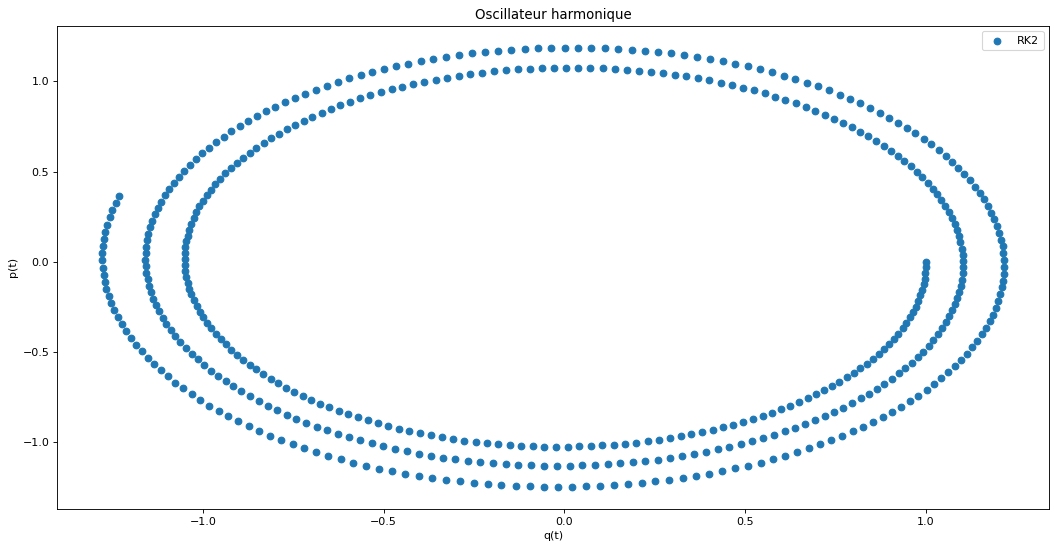

In [28]:
# Tracer pn et qn dans le plan de phase 
# Tracer les solutions pn et qn obtenues en fonction du temps t et comparer à la solution exacte 
plt.figure(figsize=(16, 8), dpi=80)
plt.title("Oscillateur harmonique")
plt.scatter(tab_q_RK2, tab_p_RK2, label="RK2")
plt.xlabel("q(t)")
plt.ylabel("p(t)")
plt.legend()
plt.show()

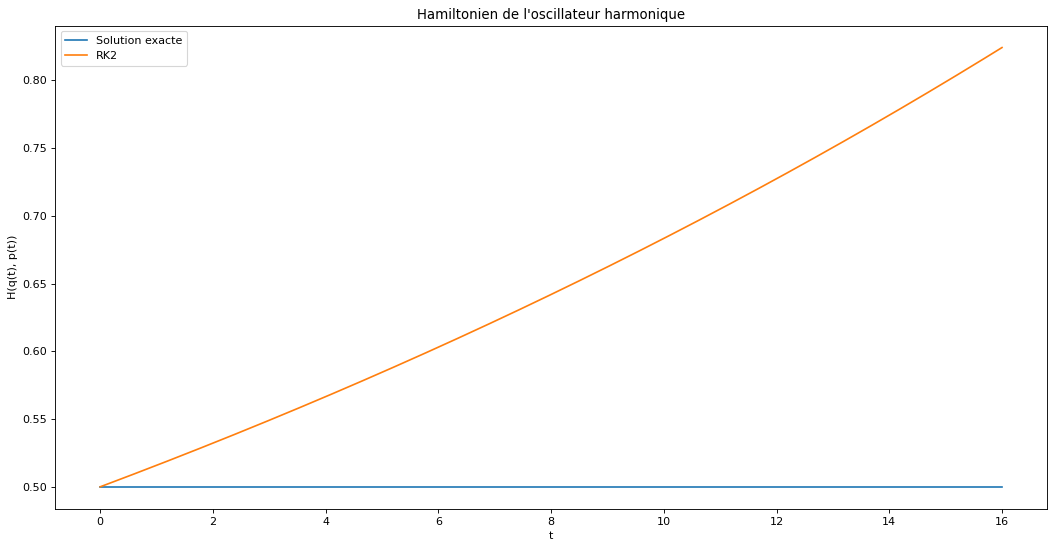

In [29]:
# Tracer H(pn,qn) en fonction de tn 
plt.figure(figsize=(16, 8), dpi=80)
plt.title("Hamiltonien de l'oscillateur harmonique")
plt.plot(t, np.ones(len(t))*0.5, label="Solution exacte")
plt.plot(t, 0.5*(tab_q_RK2**2 + tab_p_RK2**2), label="RK2")
plt.xlabel("t")
plt.ylabel("H(q(t), p(t))")
plt.legend()
plt.show()

**Réponse :**

<div class="alert alert-block alert-info">
    Même avec la méthode de Runge Kutta d'ordre 2, on n'a pas une bonne approximation de la solution exacte. Comme c'était le cas pour le schéma d'Euler explicite, on observe que l'énergie et croissante.
</div>

### Question 4 : Schéma symplectique

On considère maintenant le schéma suivant

$$ \left\{ \begin{aligned}
    q_{n+1} &= q_n +\frac{\Delta t}{2}(p_n+p_{n+1}),\\
    p_{n+1} &= p_n -\frac{\Delta t}{2}(q_n+q_{n+1}).
  \end{aligned} \right. \qquad{} (3)$$

>Dans le cadre général des équations de la forme $y'=f(t,y)$, ce schéma s'écrit
>
>$$y_{n+1} = y_n + \Delta t f\left(t_n+\frac{\Delta t}{2},\ \frac{y_n+y_{n+1}}{2}\right). \qquad{} (4)$$
>
>Il est parfois également appelé méthode du point milieu implicite, mais on remarquera que ce n'est pas le même schéma que celui introduit à la question 2 de l'exercice 1! Le schéma (4) n'est pas un schéma de type Runge-Kutta.

$1$. Montrer que l'on peut obtenir une formulation explicite du schéma (3), c'est-à-dire écrire $q_{n+1}$ et $p_{n+1}$ comme une fonction de $q_n$ et de $p_n$

$$ (q_{n+1},p_{n+1}) = \phi_{\Delta t}(q_n,p_n). $$

Expliciter la fonction $\phi_{\Delta t}$.

<div class="alert alert-block alert-info">
    On a
    $$\begin{align}
    \begin{cases}
    q_{n+1} &= q_n + \Delta t \left( \frac{p_{n+1} + p_n}{2} \right) \\
    p_{n+1} &= p_n - \Delta t \left( \frac{q_{n+1} + q_n}{2} \right)
    \end{cases}
    \end{align}$$
    ce qui donne
    $$\begin{align}
    \begin{cases}
    q_{n+1} &= \frac{\Delta t p_n + \left( 1 - \frac{\Delta t^2}{4} \right)q_n}{1 + \frac{\Delta t^2}{4}} \\
    p_{n+1} &= \frac{-\Delta t q_n + \left( 1 - \frac{\Delta t^2}{4} \right)p_n}{1 + \frac{\Delta t^2}{4}}
    \end{cases}
    \end{align}$$
</div>

$2$. **<font color=black><span style="background-color:deepskyblue">Bonus :</span></font>** 

$a$. Implémenter le schéma (3). *On utilisera la formule explicite $\phi_{\Delta t}$ obtenue à la question précédente.*

$b$. Tester avec à nouveau $\Delta t_n = \Delta t = 2^{-3}$, $(q_0,p_0) = (1,0)$ et $T=2^8$ (i.e. $N=2^{11}$ pas de temps) et afficher $p_n$, $q_n$ et $\mathcal{H}(q_n,p_n)$ en fonction du temps ainsi que $(q_n,p_n)$ dans le plan de phase. Afficher à chaque fois également la solution analytique.

$c$. On fixe maintenant $T=2^4$. Etudier numériquement l'ordre du schéma (3), en traçant $\max_{0\leq n \leq N } ||(q_n,p_n) -(q(t_n),p(t_n))||_{\infty}$ en fonction du nombre $N$ de pas de temps (i.e. avec $\Delta t=T/N$), et vérifier ce shcéma est également d'ordre 2. On prendre $N = 2^i$ pour $i$ entiers allant de 5 à 10.

$d$. Commenter l'ensemble des résultats obtenus et compararer les avantages et inconvénients du schéma symplectique par rapport aux schemas précédents. 

In [30]:
def symplectique_oscillateur(q0, p0, dt, N):
    """
    Calcule les itérés successifs y_n obtenus avec le schéma (3) sur le problème (2)
    ----------   
    parametres:
    q0, p0 : conditions initiale
    dt     : pas de temps 
    N      : nombre de pas de temps
    
    valeurs de retour:
    (tab_q, tab_p) : tableaux contenant les valeurs de p_n et q_n à chaque itération
    """
    tab_q = np.zeros(N+1)
    tab_p = np.zeros(N+1)
    
    tab_q[0] = q0
    tab_p[0] = p0
    for i in range(1, N+1):
        tab_q[i] = (dt*tab_p[i-1] + (1 - (dt**2)/4)*tab_q[i-1])/(1 + (dt**2)/4)
        tab_p[i] = (-dt*tab_q[i-1] + (1 - (dt**2)/4)*tab_p[i-1])/(1 + (dt**2)/4)
        
    return tab_q, tab_p

In [31]:
# Tester votre implémentation avec les paramètres donnés
q0 = 1
p0 = 0
dt = 2**-5
N = 2**9

tab_q_symplectique, tab_p_symplectique = symplectique_oscillateur(q0, p0, dt, N)

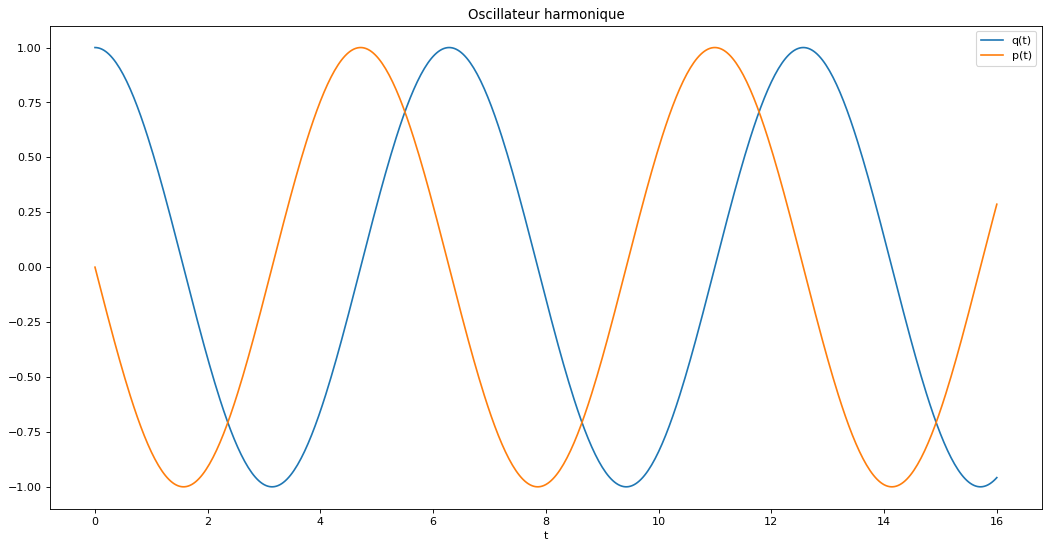

In [32]:
# Tracer les solutions numériques obtenues en fonction de tn et comparer à p(tn) et q(tn) exactes
# Tracer pn et qn en fonction de tn
t = np.linspace(0, 16, N+1)
plt.figure(figsize=(16, 8), dpi=80)
plt.title("Oscillateur harmonique")
plt.plot(t, tab_q_symplectique, label="q(t)")
plt.plot(t, tab_p_symplectique, label="p(t)")
plt.xlabel("t")
plt.legend()
plt.show()

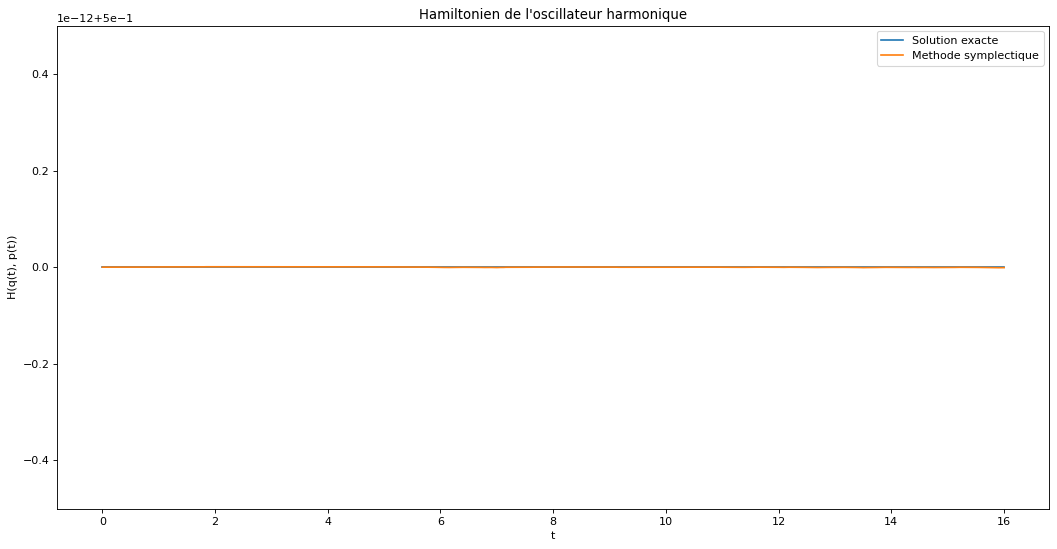

In [33]:
# Tracer H(pn,qn) en fonction de tn et comparer à H(p(tn),q(tn)) exacte et dans le plan de phase
# Tracer H(pn,qn) en fonction de tn 
plt.figure(figsize=(16, 8), dpi=80)
plt.title("Hamiltonien de l'oscillateur harmonique")
plt.plot(t, np.ones(len(t))*0.5, label="Solution exacte")
plt.plot(t, 0.5*(tab_q_symplectique**2 + tab_p_symplectique**2), label="Methode symplectique")
plt.xlabel("t")
plt.ylabel("H(q(t), p(t))")
plt.legend()
plt.show()

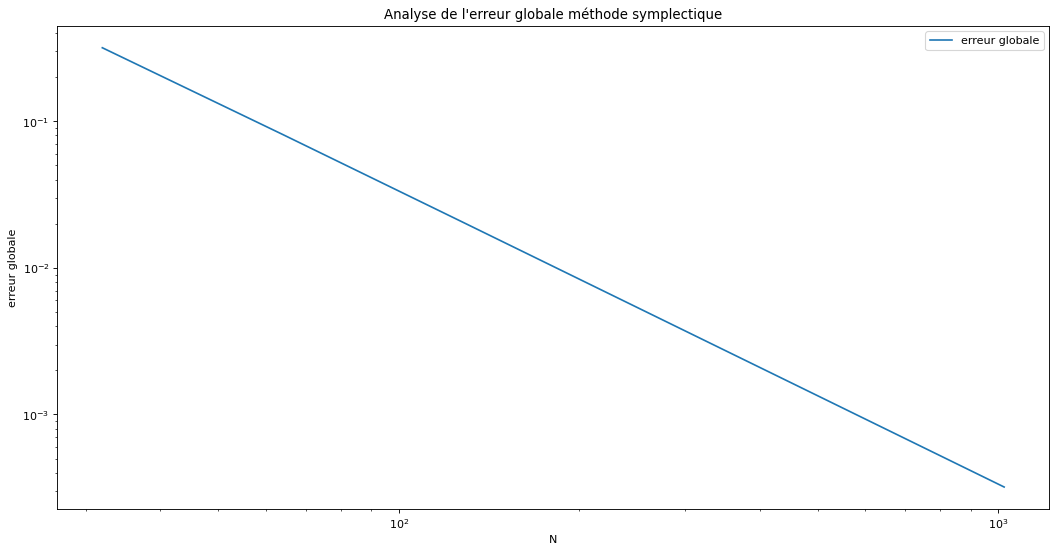

In [34]:
# Tracer la courbe d'erreur en fonction de N en échelle loglog
plt.figure(figsize=(16, 8), dpi=80)

en = np.zeros(6)
delta_t = np.zeros(6)
ns = np.zeros(6)

for i in range(5, 11):
    N = 2**i #on calcule l'erreur globale pour chaque N
    dt = 16.0/N
    
    tab_q_symplectique, tab_p_symplectique = symplectique_oscillateur(q0, p0, dt, N)
    
    t = np.linspace(0, 16, N + 1)
    
    en[i-5] = max(np.max(abs(np.cos(t) - tab_q_symplectique)), np.max(abs(-np.sin(t) - tab_p_symplectique)))
    ns[i-5] = N

plt.title("Analyse de l'erreur globale méthode symplectique")
plt.plot(ns, en, label="erreur globale")
plt.xlabel("N")
plt.ylabel("erreur globale")
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

**Réponse :**

<div class="alert alert-block alert-info">
    On en conclue qu'il s'agit d'un schéma d'ordre 2. En plus, le schéma symplectique a donné une très bonne approximation de la solution exacte. D'autre part, l'énergie est reste constante ce qui n'était pas le cas pour les schémas testés auparavant.
</div>

$3$. Calculer explicitement $\mathcal{H}(q_{n},p_{n})$ en fonction de $n$, $\Delta t$ et $\mathcal{H}(q_0,p_0)$ pour ce schéma, et vérifier la cohérence avec les résultats numériques obtenus à la question précédente.

>On peut vérifier que le schéma (4) est sympleptique, c'est-à-dire qu'il vérifie
>
>$${}^T D\phi_{\Delta t}(q,p) \, J \,  D\phi_{\Delta t}(q,p) = J, \quad \text{ où } \quad
  J = \begin{pmatrix}
    0 & -1 \\
    1 &  0
  \end{pmatrix}.$$
>
>On peut montrer qu'un schéma symplectique appliqué à un système hamiltonien canonique conserve toujours une certaine quantité $\tilde {\mathcal{H}}_{\Delta t} (q_{n+1},p_{n+1})=\tilde {\mathcal{H}}_{\Delta t} (q_{n},p_{n})$. Généralement, on n'a pas exactement $\tilde {\mathcal{H}}_{\Delta t} = \mathcal{H}$, mais seulement $\tilde {\mathcal{H}}_{\Delta t} \underset{\Delta t\to 0}{\longrightarrow} \mathcal{H}$.

<div class="alert alert-block alert-info">
    On a $\mathcal{H}(q_{n+1},p_{n+1}) = \mathcal{H}(q_{n},p_{n}) \implies \mathcal{H}(q_{n},p_{n}) = \mathcal{H}(q_{0},p_{0}) = \frac{1}{2}$. $\\$
    Donc, le schéma symplectique conserve l'énergie pour l'oscillateur harmonique qu'on a consideré. En effet, c'est ce qu'on a observé quand on a tracé $\mathcal{H}(q_{n},p_{n})$ en fonction de $t_n$.
</div>